1. Carga y Exploración Inicial de Datos:


Cargar el dataset desde Kaggle.


Realizar una exploración inicial para entender la estructura del dataset y las características disponibles.


Identificar y documentar los valores faltantes y outliers en el dataset.

In [ ]:
import pandas as pd
import numpy as np

url = 'https://drive.google.com/uc?id=1ZGPQWhbcIXqcJfMLggVODW8mW5ful01l&export=download'
df = pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe().round(3)

,age,bmi,children,charges
count,1338.000,1338.000,1338.000,1338.000
mean,39.207,30.663,1.095,13270.422
std,14.050,6.098,1.205,12110.011
min,18.000,15.960,0.000,1121.874
25%,27.000,26.296,0.000,4740.287
50%,39.000,30.400,1.000,9382.033
75%,51.000,34.694,2.000,16639.913
max,64.000,53.130,5.000,63770.428


In [ ]:
df.duplicated().sum()  # Verificación de datos duplicados

1

Eliminación de datos duplicados, ya que puede alterar el modelo, por lo cual es eliminada.

In [ ]:
df = df.drop_duplicates() # Eliminación de fila duplicada

In [ ]:
df.isnull().sum()  # Verificación de datos nulos

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Verificación de las variables catégoricas

In [ ]:
for columna in df.columns:
  print(f'Valores únicos en la columna {columna}:\n{df[columna].unique()}\n')

Valores únicos en la columna age:
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]

Valores únicos en la columna sex:
['female' 'male']

Valores únicos en la columna bmi:
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 

Visualización de los datos, para revisar si hay presencia de outliers

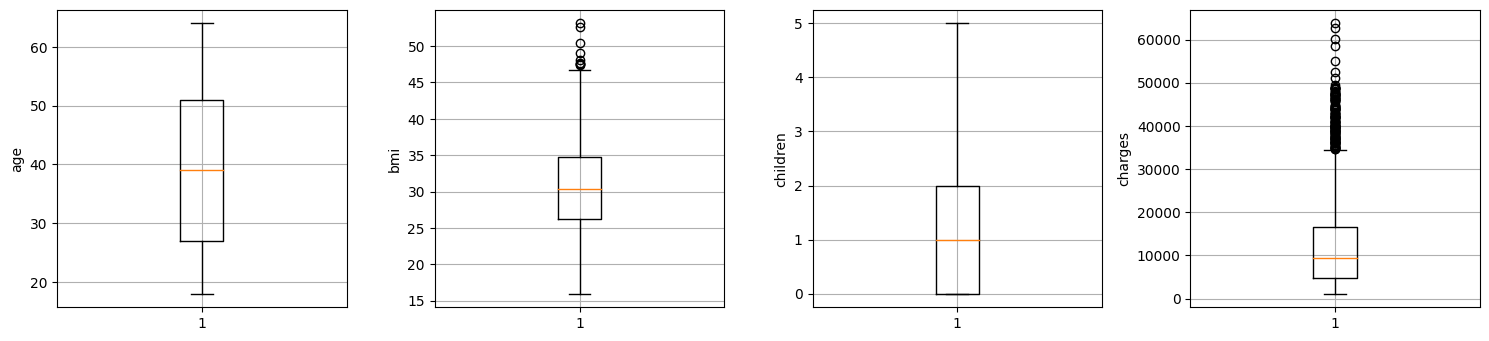

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
columnas = df.select_dtypes([np.number]).columns
n = 1
plt.figure(figsize=(15,10), dpi=100)
for columna in columnas:
  plt.subplot(3,4,n)
  n = n+1
  plt.ylabel(columna)
  plt.boxplot(df[columna])
  plt.grid(True)
  plt.tight_layout()

In [ ]:
df.sex.value_counts()

,count
sex,
male,675
female,662


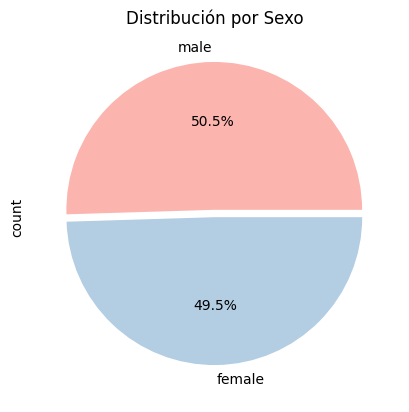

In [ ]:
colors = plt.get_cmap('Pastel1').colors
df.sex.value_counts().plot(kind ="pie" , autopct='%1.1f%%', colors=colors, explode=(0.05 , 0))
plt.title("Distribución por Sexo")
plt.show()

La distribución de género se encuentra muy equitativa.

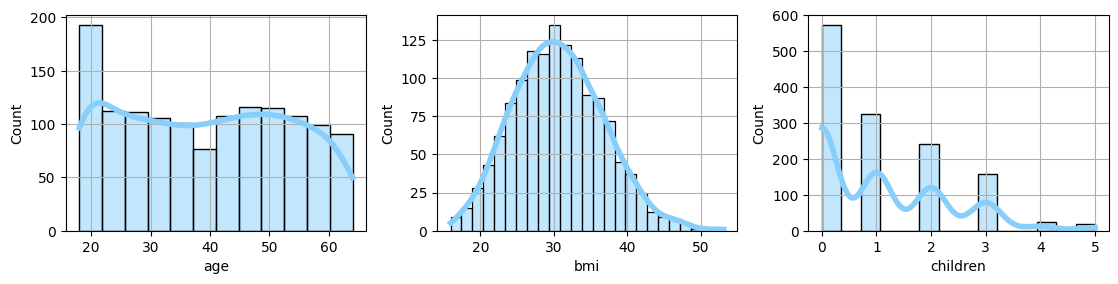

In [ ]:
columnas = df.select_dtypes(include=['float64', 'int']).columns
columnas = columnas.drop(['charges'])

n = 1
plt.figure(figsize=(15,8), dpi=100)
for columna in columnas:
  plt.subplot(3,4,n)
  n = n+1
  sns.histplot(df, x = columna, stat = 'count', kde=True, color= 'lightskyblue', line_kws = {'linewidth': 4})
  plt.grid(True)
  plt.tight_layout()

Hay una mayor cantidad de personas con edad de 20, esta categoría tiene un comportamiento bimodal.

BMI tiene un comportamiento en forma de campana, es decir simétrico.

children, tiene un comportamiento multimodal en el que se puede ver que a mayor número de niños hay menor frecuencia.

Mapa de correlación

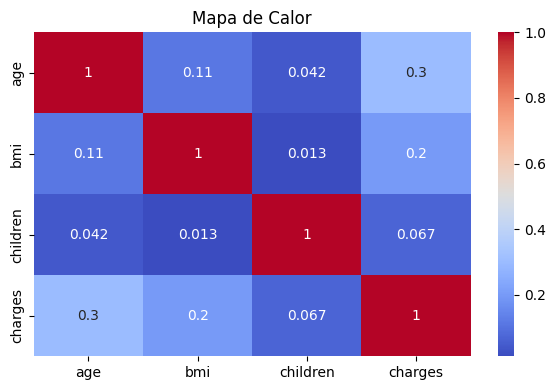

In [ ]:
correlacion = df[['age','bmi', 'children','charges']]
correlacion = correlacion.corr()
plt.figure(figsize=(6,4), dpi=100)
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor')
plt.tight_layout()
plt.show()

Se aprecia que la relación entre las características de tipo numéricas no tiene una correlación fuerte entre ellas.

<ipython-input-23-ac78304186d7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axis=sns.countplot(data = df, x = 'age', palette=sns.color_palette("Blues_d"))
<ipython-input-23-ac78304186d7>:2: UserWarning: 
The palette list has fewer values (6) than needed (47) and will cycle, which may produce an uninterpretable plot.
  axis=sns.countplot(data = df, x = 'age', palette=sns.color_palette("Blues_d"))


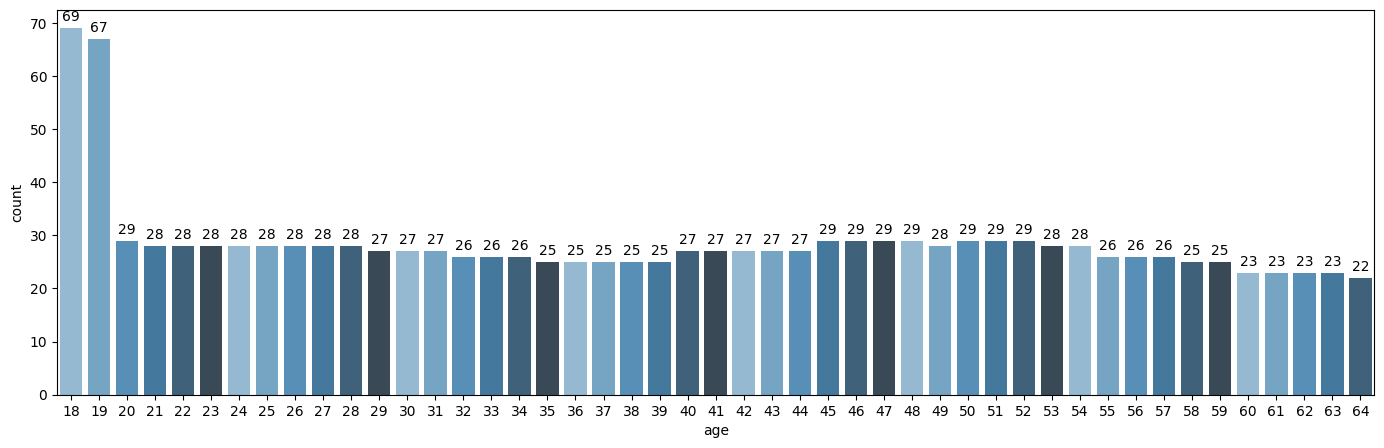

In [ ]:
plt.figure(figsize=(17,5))
axis=sns.countplot(data = df, x = 'age', palette=sns.color_palette("Blues_d"))

# Iterar sobre las barras y agregar etiquetas manualmente
for container in axis.containers:
    axis.bar_label(container, label_type='edge', padding=3, fontsize=10)
plt.show()

En el gráfico de edad se puede identificar la cantidad de personas según las edades que se encuentran tomando el servicio.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
df.describe().round(3)

,age,bmi,children,charges
count,1337.000,1337.000,1337.000,1337.000
mean,39.222,30.663,1.096,13279.121
std,14.044,6.100,1.206,12110.360
min,18.000,15.960,0.000,1121.874
25%,27.000,26.290,0.000,4746.344
50%,39.000,30.400,1.000,9386.161
75%,51.000,34.700,2.000,16657.717
max,64.000,53.130,5.000,63770.428


Creación de columna en el que se establece con base 'charges' categorías como '0' bajo y '1' alto.

In [ ]:
# Clasificación de valores
df['Nivel cargo'] = df['charges'].apply(lambda x: 0 if x <= 7000.0 else 1)
df.head()

,age,sex,bmi,children,smoker,region,charges,Nivel cargo
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1337 non-null   int64  
 1   sex          1337 non-null   object 
 2   bmi          1337 non-null   float64
 3   children     1337 non-null   int64  
 4   smoker       1337 non-null   object 
 5   region       1337 non-null   object 
 6   charges      1337 non-null   float64
 7   Nivel cargo  1337 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 94.0+ KB


2. Preprocesamiento de Datos:


Imputar valores faltantes utilizando técnicas adecuadas (media, mediana, moda, imputación avanzada).


Codificar variables categóricas utilizando One-Hot Encoding.


Escalar características numéricas utilizando StandardScaler.

Preprocesamiento de los datos

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

Separación del target de la características de l dataframe

In [ ]:
X = df.drop(['Nivel cargo'], axis=1)
y = df['Nivel cargo']

In [ ]:
#Preparación de datos: Divide los datos en un conjunto de entrenamiento (70%) y un conjunto de prueba (30%).
# Dividir los datos en conjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 58)

In [ ]:
#Definir las columnas numéricas y categóricas.

numeric_features = ['age', 'bmi', 'children', 'charges' ]

categorical_features = ['region', 'smoker', 'sex']

In [ ]:
# creación de un Pipeline para columnas numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy= 'mean')), # relleno de faltantes si es que los hay
    ('scaler', StandardScaler()) # Escalado de las categorías numéricas
])


In [ ]:
# Creación de un Pipeline para columnas categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy= 'most_frequent')),
    ('nominal', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding de las categóricas
])

In [ ]:
# Usar ColumnTransformer para aplicar las transformaciones a las columnas correctas
preprocessor = ColumnTransformer(
    transformers=[
        ('numerica', numeric_transformer, numeric_features),
        ('categorica', categorical_transformer, categorical_features)
    ],
   remainder='passthrough', # Dejar columnas no transformadas
   n_jobs= -1,
    verbose= True,
    sparse_threshold= 0.3
)

preprocessor

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('numerica',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'bmi', 'children', 'charges']),
                                ('categorica',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('nominal',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['region', 'smoker', 'sex'])],
                  verbose=True)

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
lazy = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = lazy.fit(X_train, X_test, y_train, y_test)
data = pd.DataFrame(models)
data.head()

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
 97%|█████████▋| 28/29 [00:04<00:00,  4.60it/s]

[LightGBM] [Info] Number of positive: 580, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 580
[LightGBM] [Info] Number of data points in the train set: 935, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.620321 -> initscore=0.490910
[LightGBM] [Info] Start training from score 0.490910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

100%|██████████| 29/29 [00:04<00:00,  6.19it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.07
BaggingClassifier,1.00,1.00,1.00,1.00,0.10
XGBClassifier,1.00,1.00,1.00,1.00,0.67
RandomForestClassifier,1.00,1.00,1.00,1.00,0.56
LGBMClassifier,1.00,1.00,1.00,1.00,0.33


Selección de hiperparámetros

3. Implementación de Modelos de Clasificación:


Entrenar y evaluar al menos tres modelos de clasificación diferentes: Regresión Logística, K-Nearest Neighbors (KNN), y Árbol de Decisión.


Utilizar validación cruzada para evaluar el rendimiento inicial de los modelos.


Los modelos a los que se les va a realizar la búsqueda hiperparámetros son:
Bagging Classifier, Random Forest Classifier, XGB Classifier y LGBM Classifier

**Bagging Clssifier**

In [ ]:
bagging = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('modelo', BaggingClassifier())
])

In [ ]:
parametros = {
    'modelo__n_estimators':[20, 40, 80],
    'modelo__max_samples': [0.5, 0.8, 1.2],
    'modelo__max_features': [0.5, 0.8, 1.2]
}

In [ ]:
# Gridsearch

g_bag = GridSearchCV(bagging, parametros, cv=5, n_jobs= -1, scoring='accuracy')

g_bag.fit(X_train,y_train)

# Randomized SearchCV

R_bag1 = RandomizedSearchCV(bagging, parametros, n_iter=50, scoring= 'accuracy', cv=5, n_jobs= -1, random_state=50)
R_bag1.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(n_jobs=-1,
                                                                remainder='passthrough',
                                                                transformers=[('numerica',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'bmi',
                                                                                'children',
                                                                                'charges']),
                                                                              ('categorica',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('nominal',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['region',
                                                                                'smoker',
                                                                                'sex'])],
                                                                verbose=True)),
                                             ('modelo', BaggingClassifier())]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'modelo__max_features': [0.5, 0.8, 1.2],
                                        'modelo__max_samples': [0.5, 0.8, 1.2],
                                        'modelo__n_estimators': [20, 40, 80]},
                   random_state=50, scoring='accuracy')

In [ ]:
# Evaluación modelo Bagging con GridSearch

mejor_bagging = g_bag.best_estimator_
y_pred_bag = mejor_bagging.predict(X_test)

# Evaluación con reporte de clasificación
r_bagging = classification_report(y_test, y_pred_bag)
matriz_bag = confusion_matrix(y_test, y_pred_bag)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bag)
roc_auc = auc(fpr, tpr)


4. Optimización de Hiperparámetros:


Implementar GridSearchCV para optimizar los hiperparámetros de los modelos seleccionados.


Implementar RandomizedSearchCV como método alternativo de optimización.


Comparar los resultados de GridSearchCV y RandomizedSearchCV para los modelos optimizados.

5. Evaluación de Modelos:


Evaluar los modelos optimizados utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.


Generar y analizar la matriz de confusión para los modelos optimizados.


Crear y visualizar la curva ROC para evaluar la capacidad del modelo para distinguir entre clases.

Métricas modelo Bagging con GridSearch
Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00       256

    accuracy                           1.00       402
   macro avg       1.00      1.00      1.00       402
weighted avg       1.00      1.00      1.00       402



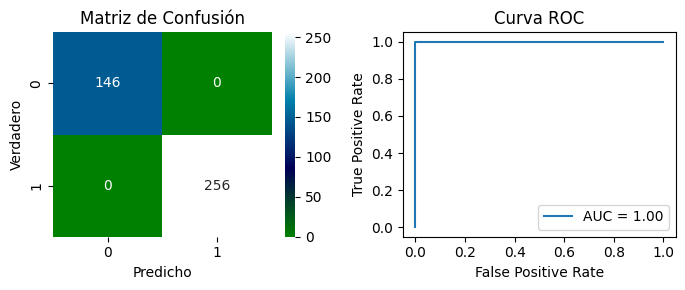

In [ ]:
# Visualizaciones modelo Bagging con GridSearch
print('Métricas modelo Bagging con GridSearch')
print('Informe de clasificación:')
print(r_bagging)

# Crear la figura y los subplots
plt.figure(figsize=(7,3), dpi=100)

# Subplot 1: Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(matriz_bag, annot=True, fmt='d', cmap='ocean')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

# Subplot 2: Curva ROC
plt.subplot(1, 2, 2)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(ax=plt.gca())  # Especificamos el eje actual
plt.title('Curva ROC')

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()


In [ ]:
# Evaluación modelo Bagging con Randomized SearchCV

mejor_bagging2 = R_bag1.best_estimator_
y_pred_bag2 = mejor_bagging2.predict(X_test)

#Evaluaciones
r_bagging2 = classification_report(y_test, y_pred_bag2)
matriz_bag2 = confusion_matrix(y_test, y_pred_bag2)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bag2)
roc_auc = auc(fpr, tpr)


Métricas modelo Bagging con RandomizedSearchCV
Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00       256

    accuracy                           1.00       402
   macro avg       1.00      1.00      1.00       402
weighted avg       1.00      1.00      1.00       402



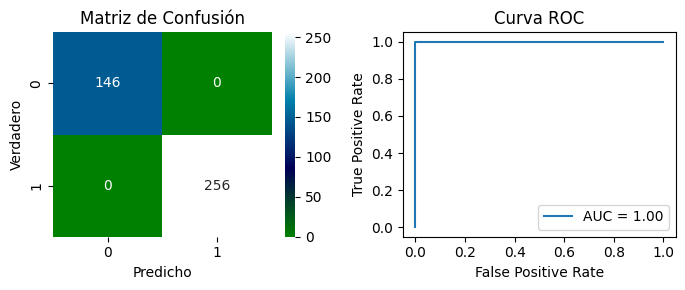

In [ ]:
#visualizaciones modelo Bagging con Randomized SearchCV
print('Métricas modelo Bagging con RandomizedSearchCV')
print('Informe de clasificación:')
print(r_bagging2)

# Crear la figura y los subplots
plt.figure(figsize=(7, 3), dpi=100)

# Subplot 1: Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(matriz_bag2, annot=True, fmt='d', cmap='ocean')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

# Subplot 2: Curva ROC
plt.subplot(1, 2, 2)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(ax=plt.gca())  # Especificamos el eje actual
plt.title('Curva ROC')

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()

Al realizar la optimización de parámetros con GridSearch y RandomizedSearchCV se puede evidenciar que el modelo se comporta de excelente forma, ya que en ambos presenta unas métricas perfectas y una matriz de confusión con predicciones acertadas en su totalidad.

**Random Forest**

In [ ]:
# Deifnición del modelo Random Forest

random = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('modelo', RandomForestClassifier())
])

parametros = {
    'modelo__n_estimators': [75, 95, 150],
    'modelo__max_depth': [None, 10, 20],
    'modelo__min_samples_leaf': [2, 4, 6]
}


4. Optimización de Hiperparámetros:


Implementar GridSearchCV para optimizar los hiperparámetros de los modelos seleccionados.


Implementar RandomizedSearchCV como método alternativo de optimización.


Comparar los resultados de GridSearchCV y RandomizedSearchCV para los modelos optimizados.

In [ ]:
# GridSearch modelo Random Forest
g_random = GridSearchCV(random, parametros, cv=5, n_jobs=-1, scoring='accuracy')
g_random.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=-1,
                                                          remainder='passthrough',
                                                          transformers=[('numerica',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children',
                                                                          'charges']),
                                                                        ('categorica',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('nominal',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['region',
                                                                          'smoker',
                                                                          'sex'])],
                                                          verbose=True)),
                                       ('modelo', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'modelo__max_depth': [None, 10, 20],
                         'modelo__min_samples_leaf': [2, 4, 6],
                         'modelo__n_estimators': [75, 95, 150]},
             scoring='accuracy')

In [ ]:
# Evaluación GridSearch modelo Random Forest

m_random = g_random.best_estimator_
y_pred_r = m_random.predict(X_test)

# Métricas de evaluación con GridSearch

r_random = classification_report(y_test, y_pred_r)
matriz_random = confusion_matrix(y_test, y_pred_r)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_r)
roc_auc = auc(fpr, tpr)


5. Evaluación de Modelos:


Evaluar los modelos optimizados utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.


Generar y analizar la matriz de confusión para los modelos optimizados.


Crear y visualizar la curva ROC para evaluar la capacidad del modelo para distinguir entre clases.

Métricas modelo Random Forest con GridSearchCV
Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00       256

    accuracy                           1.00       402
   macro avg       1.00      1.00      1.00       402
weighted avg       1.00      1.00      1.00       402



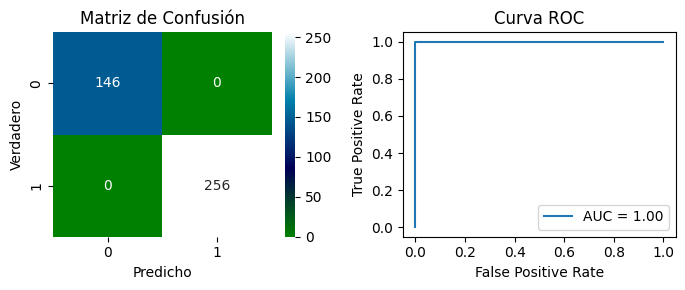

In [ ]:
# Visualizaciones modelo Random Forest
print('Métricas modelo Random Forest con GridSearchCV')
print('Informe de clasificación:')
print(r_random)

# Crear la figura y los subplots
plt.figure(figsize=(7, 3), dpi=100)

# Subplot 1: Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(matriz_random, annot=True, fmt='d', cmap='ocean')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

# Subplot 2: Curva ROC
plt.subplot(1, 2, 2)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(ax=plt.gca())  # Especificamos el eje actual
plt.title('Curva ROC')

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()

In [ ]:
# RandomizedSearch en modelo Random Forest
RF_R = RandomizedSearchCV(m_random, parametros, cv=5, n_jobs= -1, scoring= 'accuracy', random_state= 48)
RF_R.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(n_jobs=-1,
                                                                remainder='passthrough',
                                                                transformers=[('numerica',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'bmi',
                                                                                'children',
                                                                                'charges']),
                                                                              ('categorica',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('nominal',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['region',
                                                                                'smoker',
                                                                                'sex'])],
                                                                verbose=True)),
                                             ('modelo',
                                              RandomForestClassifier(min_samples_leaf=2,
                                                                     n_estimators=75))]),
                   n_jobs=-1,
                   param_distributions={'modelo__max_depth': [None, 10, 20],
                                        'modelo__min_samples_leaf': [2, 4, 6],
                                        'modelo__n_estimators': [75, 95, 150]},
                   random_state=48, scoring='accuracy')

In [ ]:
# Evaluación modelo Random Forest con Randomized SearchCV

mejor_R2 = RF_R.best_estimator_
y_pred_R2 = mejor_R2.predict(X_test)

#Evaluaciones
r_R2 = classification_report(y_test, y_pred_R2)
matriz_R2 = confusion_matrix(y_test, y_pred_R2)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_R2)
roc_auc = auc(fpr, tpr)

Métricas modelo Random Forest Classifier con RandomizedSearchCV
Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00       256

    accuracy                           1.00       402
   macro avg       1.00      1.00      1.00       402
weighted avg       1.00      1.00      1.00       402



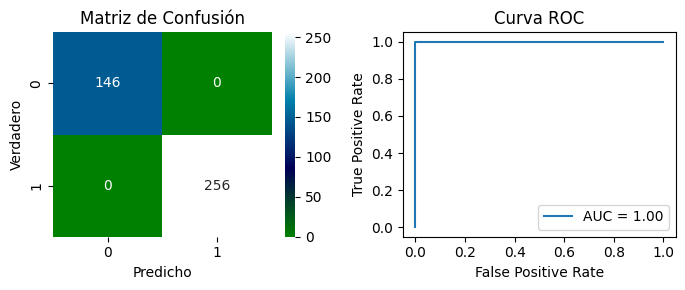

In [ ]:
#visualizaciones Random Forest Classifier
print('Métricas modelo Random Forest Classifier con RandomizedSearchCV')
print('Informe de clasificación:')
print(r_R2)

# Crear la figura y los subplots
plt.figure(figsize=(7, 3), dpi=100)

# Subplot 1: Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(matriz_R2, annot=True, fmt='d', cmap='ocean')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

# Subplot 2: Curva ROC
plt.subplot(1, 2, 2)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(ax=plt.gca())  # Especificamos el eje actual
plt.title('Curva ROC')

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()

**XGB Classifier**

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
# Deifnición del modelo XGB Classifier

XGB = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('modelo', (XGBClassifier()))
])

parametro= {
    'modelo__n_estimators': [80, 10, 120],
    'modelo__learning_rate': [0.01, 0.1, 0.2],
    'modelo__max_depth': [8, 10, 15],
    'modelo__subsample': [0.5, 0.8, 1.0],
    'modelo__colsample_bytree': [0.5, 0.8, 1.0],
    'modelo__gamma': [0, 0.1, 0.3]
}

In [ ]:
# optimización con GridSearch
g_XGB = GridSearchCV(estimator=XGB, param_grid=parametros,scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
g_XGB.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=-1,
                                                          remainder='passthrough',
                                                          transformers=[('numerica',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children',
                                                                          'charges']),
                                                                        ('categorica',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('nominal',
                                                                                          OneHotEnc...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'modelo__max_depth': [None, 10, 20],
                         'modelo__min_samples_leaf': [2, 4, 6],
                         'modelo__n_estimators': [75, 95, 150]},
             scoring='accuracy', verbose=1)

In [ ]:
# Evaluación GridSearch modelo XGB Classifier

m_XGB = g_XGB.best_estimator_
y_pred_XGB = m_XGB.predict(X_test)

# Métricas de evaluación con GridSearch

r_XGB = classification_report(y_test, y_pred_XGB)
matriz_XGB = confusion_matrix(y_test, y_pred_XGB)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_XGB)
roc_auc = auc(fpr, tpr)

Métricas modelo XGB Classifier con GridSearchCV
Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00       256

    accuracy                           1.00       402
   macro avg       1.00      1.00      1.00       402
weighted avg       1.00      1.00      1.00       402



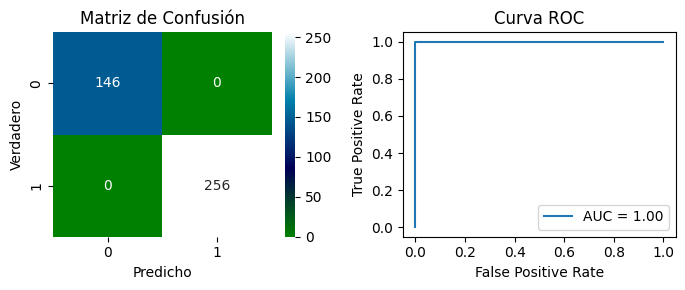

In [ ]:
# Visualizaciones modelo Random XGB Classifier
print('Métricas modelo XGB Classifier con GridSearchCV')
print('Informe de clasificación:')
print(r_XGB)

# Crear la figura y los subplots
plt.figure(figsize=(7, 3), dpi=100)

# Subplot 1: Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(matriz_XGB, annot=True, fmt='d', cmap='ocean')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

# Subplot 2: Curva ROC
plt.subplot(1, 2, 2)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(ax=plt.gca())  # Especificamos el eje actual
plt.title('Curva ROC')

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()



In [ ]:
# Optimización con RandomizedSearchCV
random_XGB = RandomizedSearchCV(estimator=XGB, param_distributions=parametros, scoring='accuracy', cv=5, verbose=1,
                                n_jobs=-1, n_iter=20, random_state=36)
random_XGB.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(n_jobs=-1,
                                                                remainder='passthrough',
                                                                transformers=[('numerica',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'bmi',
                                                                                'children',
                                                                                'charges']),
                                                                              ('categorica',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('nominal',
                                                                                                One...
                                                            max_leaves=None,
                                                            min_child_weight=None,
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            random_state=None, ...))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'modelo__max_depth': [None, 10, 20],
                                        'modelo__min_samples_leaf': [2, 4, 6],
                                        'modelo__n_estimators': [75, 95, 150]},
                   random_state=36, scoring='accuracy', verbose=1)

In [ ]:
# Evaluación RandomizedSearchCV modelo XGB Classifier

m_XGB1 = random_XGB.best_estimator_
y_pred_XGB1 = m_XGB1.predict(X_test)

# Métricas de evaluación con RandomizedSearchCV

r_XGB1 = classification_report(y_test, y_pred_XGB1)
matriz_XGB1 = confusion_matrix(y_test, y_pred_XGB1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_XGB1)
roc_auc = auc(fpr, tpr)

Métricas modelo XGB Classifier con RandomizedSearchCV
Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00       256

    accuracy                           1.00       402
   macro avg       1.00      1.00      1.00       402
weighted avg       1.00      1.00      1.00       402



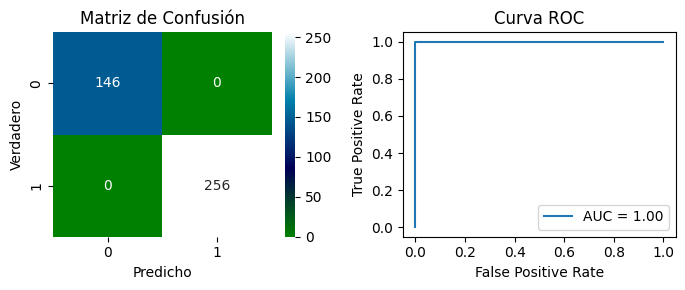

In [ ]:
# Visualizaciones modelo Random XGB Classifier
print('Métricas modelo XGB Classifier con RandomizedSearchCV')
print('Informe de clasificación:')
print(r_XGB1)

# Crear la figura y los subplots
plt.figure(figsize=(7, 3), dpi=100)

# Subplot 1: Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(matriz_XGB1, annot=True, fmt='d', cmap='ocean')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

# Subplot 2: Curva ROC
plt.subplot(1, 2, 2)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(ax=plt.gca())  # Especificamos el eje actual
plt.title('Curva ROC')

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()

**Conclusión:**

Como conclusión los modelos Random Forest Classifier, Bagging y XGB Classifier al ser optimizados presentan métricas excelentes, con una curva ROC perfecta lo que indica es un buen resultado por parte de los modelos.

Aunque el target no este distribuido de forma uniforme, los  modelos adaptaron sus mejores parámetros para lograr buenos resultados.